## Problem 1.
Open the image pic2.jpg and display it with the name pic2. Convert the image to grayscale and
plot the histogram of pixel intensities using matplotlib.

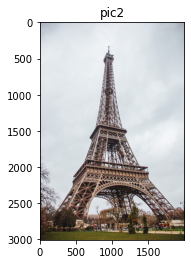

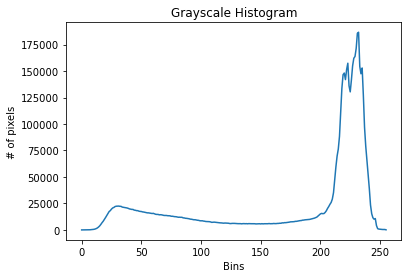

In [1]:
#histogram - visualizing distribution of pixel intencities (both colored and gray-scale images)

#x-axis - color intencity, 0 ... 255 
#y-axis - the number of pixels of that intencity
#you can choose the number of bins

#use cases - tonal range, contrast, brightness, dominant colors (histogram of a Hue channel, for color images)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('pic2.jpg') 

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('pic2')
plt.show()

#converting to grayscale

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#computing grayscale histogram

#image list, index of the channel (0 for grayscale), mask, histSize - the number of bins for the histogram, 
#ranges (all possible pixel values)
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256]) 
gray_hist = [i[0] for i in gray_hist]

#let's use matplotlib to plot the image

x = np.arange(256)
plt.plot(x,gray_hist)
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.show()

## Problem 2.
Repeat the previous exercise without converting the image to grayscale and get 3 histograms
for each of the color channels on one plot.

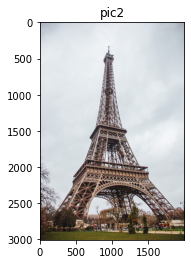

0
1
2


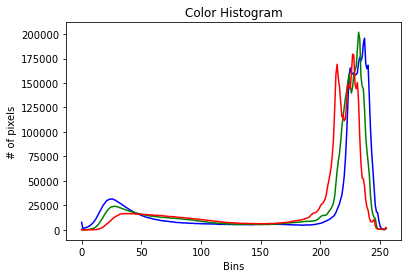

In [2]:
img = cv.imread('pic2.jpg') 

#computing bgr histogram

colors = ('b', 'g', 'r')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('pic2')
plt.show()

for i, col in enumerate(colors):
    print(i)
    hist = cv.calcHist([img], [i], None, [256], [0,256]) 
    x = np.arange(256)
    plt.plot(x,hist, color=col)
    plt.title('Color Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of pixels')


plt.show()

## Problem 3.
Open the image pic1.jpg and display it with the name pic1. Binarize the image using 3 different
methods: choosing the threshold by hand and using THRESH_BINARY method, using adaptive
thresholding with mean and gaussian methods. Display the 3 results in separate windows.

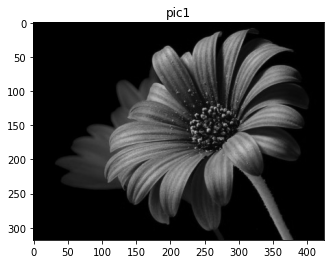

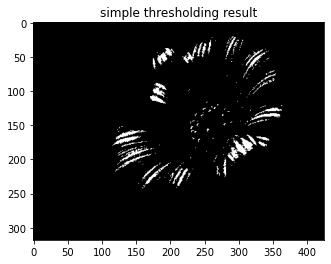

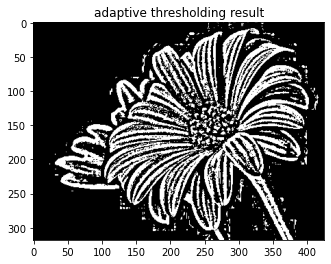

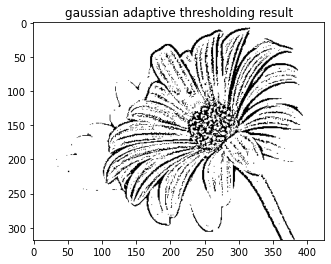

In [3]:
#thresholding is a binarization of an image, where pixels are either 0 - black or 255 - white

#we will choose a thresholding value and compare each pixel to this value
#if the pixel value is <thresh -> pixel intensity is set to 0, otherwise - 255

#simple and adaptive thresholding techniques

#first convert a bgr image to grayscale

#use case: seperating background pixels from foreground


import cv2 as cv

img = cv.imread('pic1.jpg') 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
plt.title('pic1')
plt.show()

#simple thresholding

#we need to give this function a grayscale image, threshold, maximum value (i.e. if pixel value is >150 what do we want it to be set to), thresholding type
#thresh - binarized image
#threshold - the threshold that we have given - 150 in this case
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
plt.title('simple thresholding result')
plt.show()

#we get different images with different thresholding values, we specify the threshold manually,
#which isn't the best idea in all the cases, so we could let the computer find an optimal threshold for us

#image, max value, method for computing the optimal thresh. 
#(in this case the mean of neighboring pixels), thresholding type, 
#block size (neighborhood size for mean calc.), 
#the c value (integer subtracted from the mean to finetune the threshold, 
#don't worry too much at the moment, you can set this to 0)

#idea - finding an optimal value for each block
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 0)

plt.imshow(cv.cvtColor(adaptive_thresh, cv.COLOR_BGR2RGB))
plt.title('adaptive thresholding result')
plt.show()

#adding a weight to each pixel value before computing the mean 
#(mean works in some cases, gaussian in other cases, no right way to go)
adaptive_thresh_gaussian = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 9)

plt.imshow(cv.cvtColor(adaptive_thresh_gaussian, cv.COLOR_BGR2RGB))
plt.title('gaussian adaptive thresholding result')
plt.show()

## Problem 4.
Open the image pic2.jpg and display it with the name pic2. Convert the image to grayscale. Try
detecting the edges with a method of your choice. Use one technique of your choice on the
image from what we have learned so far and try to get a better result. (better than simply using
some edge detection technique on a grayscale of a raw image)

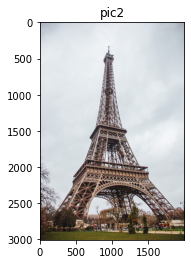

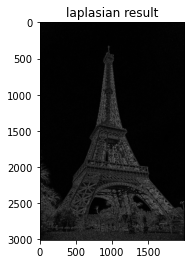

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


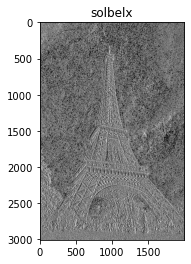

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


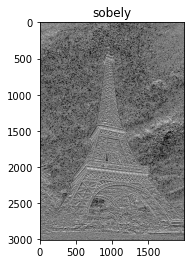

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


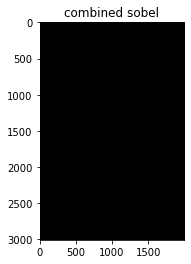

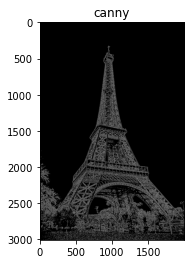

In [4]:
img = cv.imread('pic2.jpg') 

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('pic2')
plt.show()

#convert to grascale first
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#image, data depth
lap = cv.Laplacian(gray, cv.CV_64F)  #matrix value type float 64
lap = np.uint8(np.absolute(lap))

plt.imshow(cv.cvtColor(lap, cv.COLOR_BGR2RGB))
plt.title('laplasian result')
plt.show()

#laplacian method computes the gradients of the gray scale image, when we transition from black to white and vice versa - that's considered going in direction of a negative slope, that is why we compute absolute values and then convert to image dtype uint8

#sobel - computes gradients in 2 directions - x and y
#image, data depth, x direction, y direction
sobelx = cv.Sobel(gray, cv.CV_32F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_32F, 0, 1)

plt.imshow(cv.cvtColor(sobelx, cv.COLOR_BGR2RGB))
plt.title('solbelx')
plt.show()

plt.imshow(cv.cvtColor(sobely, cv.COLOR_BGR2RGB))
plt.title('sobely')
plt.show()

#sobelx is computed along the y axis, so you can see vertical lines and vice versa, in case of sobely we have horizontal lines
#we can get the combined sobel image

combined_sobel = cv.bitwise_or(sobelx, sobely)

plt.imshow(cv.cvtColor(combined_sobel, cv.COLOR_BGR2RGB))
plt.title('combined sobel')
plt.show()

#comparing both of the method results with canny

canny = cv.Canny(gray, 150, 175)

plt.imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
plt.title('canny')
plt.show()

#canny is using the sobel method to compute the gradients at one point in the algorithm steps
#sobel is usually used in more advanced cases